<a href="https://colab.research.google.com/github/muhammad-usama-aleem/Speech-Diarization/blob/main/Diarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diarization**

In [ ]:
# for speechbrain
!pip install -qq torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 torchtext==0.12.0
!pip install -qq speechbrain==0.5.12

# pyannote.audio
!pip install -qq pyannote.audio

# for visualization purposes
!pip install -qq moviepy ipython==7.34.0

     |████████████████████████████████| 750.6 MB 10 kB/s 
     |████████████████████████████████| 21.0 MB 11.5 MB/s 
     |████████████████████████████████| 2.9 MB 64.3 MB/s 
     |████████████████████████████████| 10.4 MB 49.5 MB/s 
     |████████████████████████████████| 496 kB 28.6 MB/s 
     |████████████████████████████████| 163 kB 57.5 MB/s 
     |████████████████████████████████| 1.3 MB 50.7 MB/s 
     |████████████████████████████████| 109 kB 75.5 MB/s 
     |████████████████████████████████| 546 kB 47.1 MB/s 
     |████████████████████████████████| 385 kB 23.5 MB/s 
     |████████████████████████████████| 47 kB 6.1 MB/s 
     |████████████████████████████████| 529 kB 55.0 MB/s 
     |████████████████████████████████| 60 kB 9.1 MB/s 
     |████████████████████████████████| 217 kB 62.5 MB/s 
     |████████████████████████████████| 585 kB 61.9 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 111 kB 67.0 MB/s 
     |████████████

In [ ]:
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.core.display import display
from IPython.display import Audio 
import soundfile as sf


data, rate = sf.read('/content/3_person.wav')
data = data

display(Audio(data=data.T, rate=rate))

In [ ]:
# load the pipeline from Hugginface Hub
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization@2022.07")

# apply the pipeline to an audio file
diarization = pipeline("/content/3_person.wav")

# dump the diarization output to disk using RTTM format
with open("audio.rttm", "w") as rttm:
    diarization.write_rttm(rttm)


Downloading:   0%|          | 0.00/598 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/318 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

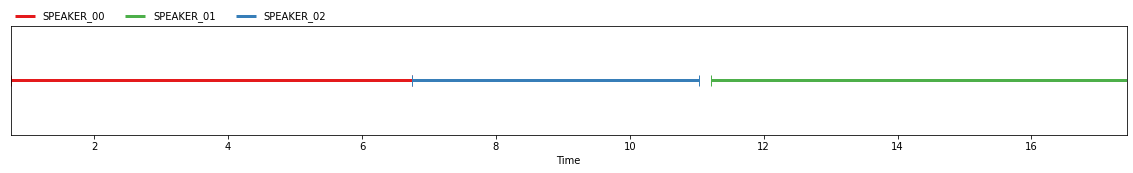

In [ ]:
diarization

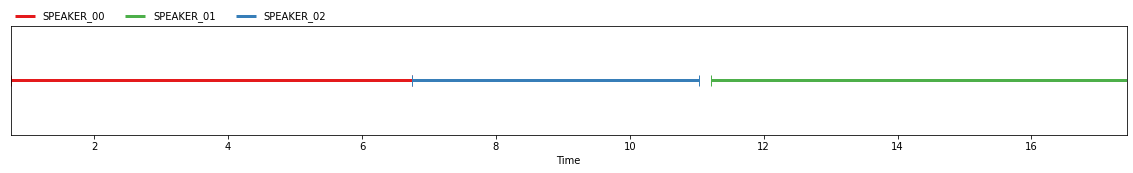

In [ ]:
# load groundtruth
from pyannote.database.util import load_rttm
_, groundtruth = load_rttm('/content/audio.rttm').popitem()

# visualize groundtruth
groundtruth

In [ ]:
!pip install pydiarization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydiarization.diarization_wrapper import rttm_to_string

string = rttm_to_string("/content/audio.rttm")

In [ ]:
string

'SPEAKER 3_person 1 0.751 5.991 <NA> <NA> SPEAKER_00 <NA> <NA>\nSPEAKER 3_person 1 6.742 4.286 <NA> <NA> SPEAKER_02 <NA> <NA>\nSPEAKER 3_person 1 11.213 6.210 <NA> <NA> SPEAKER_01 <NA> <NA>\n'

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment
from pydub.playback import play

newAudio = AudioSegment.from_wav("/content/3_person.wav")

In [ ]:
from random import randint
arr = string.split('\n')

print(arr[:-1])

no_of_speaker = []
for x in arr[:-1]:
    initial = x.split('<NA> <NA>')
    # print(initial)
    initial = ' '.join(initial).split()
    # print(initial)
    no_of_speaker.append(initial[-1])

print("no_of_speaker", no_of_speaker)

colors = []
for i in range(len(no_of_speaker)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print("colors", colors)

all_data = []
req_data = []
for x in arr[:-1]:
    initial = x.split('<NA> <NA>')
    # print(len(initial))
    # if len(initial) > 0:
    initial = ' '.join(initial).split()
    
    # print(initial)

    start = round(float(initial[-3]) * 1000, 2)
    end = round(float(initial[-2]) * 1000 + float(initial[-3]) * 1000, 2)
    cur_speaker = initial[-1]
    pos_of_speaker = no_of_speaker.index(cur_speaker)
    print('==>', cur_speaker, colors[pos_of_speaker], start, end)
    split_aud = newAudio[int(start):int(end)]
    split_aud.export(cur_speaker + '.wav', format="wav")

    # play(split_aud)
    req_data.append(start)
    req_data.append(end)
    all_data.append(initial)
print("all_data", all_data)
print("interested sect", req_data)

['SPEAKER 3_person 1 0.751 5.991 <NA> <NA> SPEAKER_00 <NA> <NA>', 'SPEAKER 3_person 1 6.742 4.286 <NA> <NA> SPEAKER_02 <NA> <NA>', 'SPEAKER 3_person 1 11.213 6.210 <NA> <NA> SPEAKER_01 <NA> <NA>']
no_of_speaker ['SPEAKER_00', 'SPEAKER_02', 'SPEAKER_01']
colors ['#FCACF7', '#5F9A2D', '#CA64AE']
==> SPEAKER_00 #FCACF7 751.0 6742.0
==> SPEAKER_02 #5F9A2D 6742.0 11028.0
==> SPEAKER_01 #CA64AE 11213.0 17423.0
all_data [['SPEAKER', '3_person', '1', '0.751', '5.991', 'SPEAKER_00'], ['SPEAKER', '3_person', '1', '6.742', '4.286', 'SPEAKER_02'], ['SPEAKER', '3_person', '1', '11.213', '6.210', 'SPEAKER_01']]
interested sect [751.0, 6742.0, 6742.0, 11028.0, 11213.0, 17423.0]
